#**CHAPTER 7. EQUITY FACTORS**
---

##0.REFERENCE

https://chatgpt.com/share/6989feed-314c-8012-966e-2298ae2e6685

##1.CONTEXT

**Introduction**

**Positioning and scope**  
This notebook is a mechanism-first laboratory for equity factor investing under correlation regimes. It is intentionally synthetic, auditable, and bounded. The object is not to forecast factor returns, fit a predictive model, or claim robust profitability. The object is to make a specific structural point legible: diversification is not a timeless property of a portfolio; it is a state-dependent property of the market. In particular, diversification capacity is local to correlation regimes, and it is typically weakest precisely when investors most need it.

Equity factor portfolios are often presented as combinations of well-known themes—value, momentum, quality, low volatility, size, profitability, investment, and variants. In professional practice, these themes are traded through long–short factor-mimicking portfolios, risk-premia sleeves inside multi-asset funds, or systematic overlays on equity books. The economic motivation is rarely “a factor works because it is named,” but because a factor is a priced exposure to a mechanism: compensation for bearing risk that is disliked, hard to warehouse, or difficult to hedge; compensation for providing liquidity; compensation for holding exposures that deliver negative skew in stress; or compensation for harvesting slow-moving behavioral or institutional frictions. In calm markets, the collection of these premia can look stable. In stress, the joint distribution changes: cross-factor correlations rise, dispersion collapses, and the map from “diversified factor sleeve” to realized risk becomes nonlinear.

**Economic context: why correlations are the market, not a statistic**  
Factor investing lives at the intersection of two objects: expected premia and the covariance structure that turns exposures into realized drawdowns. In a frictionless, stationary world, the covariance matrix is a background parameter. In actual markets, the covariance matrix is an equilibrium object that moves with risk appetite, funding conditions, and the degree of common positioning. When macro risk dominates, investors de-risk simultaneously, and heterogeneous factor bets become manifestations of one latent driver: the ability to bear equity beta, liquidity risk, and balance-sheet constraints. That is the basic economic intuition behind correlation spikes. The covariance matrix is not merely “estimated”; it is produced by the same forces that produce price moves.

This notebook operationalizes that intuition by making the covariance surface tradable and regime-driven. It constructs a synthetic factor return process whose correlation structure switches across regimes. The regimes are not decorative labels; they change the geometry of risk. In low-correlation regimes, the covariance matrix is closer to diagonal and dispersion is healthy, so a diversified basket behaves as “many small bets.” In high-correlation regimes, the covariance matrix becomes dense, dispersion compresses, and a diversified basket behaves as “one large bet with expensive rebalancing.” The regime dependence is the lesson.

**Why this mechanism matters: regime-local diversification and professional failure modes**  
Many institutional post-mortems share a common skeleton: the portfolio was diversified by construction, but not diversified in the state that occurred. This happens when diversification is defined by names, sectors, or factor labels rather than by the correlation regime that governs joint losses. Correlation spikes are particularly destabilizing because they convert what appears to be idiosyncratic risk into systematic risk at the exact moment when leverage constraints bind and execution costs rise. The fragility is structural: it is produced by the combination of changing covariances, constrained balance sheets, and forced trading.

Factor portfolios are also vulnerable to rotation narratives. In mid regimes—neither tranquil nor panicked—cross-sectional leadership can persist long enough for momentum-like rotation to look sensible. In high-correlation regimes, however, leadership is often overwhelmed by a shared shock, and rotation becomes turnover without diversification benefit. The notebook sets up this tension explicitly: a momentum rotation action exists, but it is bounded by the same execution realism and the same covariance surface. A key professional intuition is that “rotation alpha” is not separable from the correlation regime that determines how costly and how dangerous rotation is.

**What the notebook demonstrates: a surface, an agent, and a closed-loop environment**  
The notebook builds three coupled layers.

First, it constructs a regime process: a Markov-switching state variable that controls correlation level and market “crowding.” Dispersion is modeled as a mean-reverting state that co-moves with regime, capturing the stylized fact that cross-sectional differentiation tends to compress in stress.

Second, it constructs a tradable surface: a factor correlation matrix and a corresponding covariance matrix. This matrix is not a passive statistic; it is the object that determines risk scaling, leverage usage, and the realized fragility of exposures. The surface is summarized into interpretable features—average correlation and dispersion—so that a bounded policy can act without accessing hidden parameters.

Third, it implements an execution and portfolio environment. The agent selects from a finite action set that maps deterministically to target exposures. The environment applies transaction costs and a nonlinear impact proxy that rises with illiquidity in stress regimes. Leverage caps, position limits, and a drawdown stop impose survival constraints. These constraints are not optional embellishments; they are the mechanism through which theory becomes practice. A portfolio that “should” be diversified can still fail if the state changes and execution becomes punitive.

The environment runs in closed loop over time. At each time step, the agent observes a compact summary of the current state and surface, chooses an action, executes toward a target portfolio, pays costs, and realizes PnL. The notebook logs each decision with the state summary, action choice, rationale, trade, costs, leverage, and PnL contribution. The result is a trace that can be audited and interpreted.

**Agentic structure: bounded decisions, auditable behavior, and optional LLM policy**  
The notebook is designed around an execution-limited agent. The agent cannot invent trades, modify code, tune thresholds, or expand the action space. It can only select one action from a predefined list and provide a short rationale. This constraint is pedagogically important. In professional settings, many failures arise not from a lack of expressive models, but from the inability to enforce discipline under stress. A bounded agent turns the focus away from model complexity and toward mechanism discipline: how does a simple, stable decision rule behave when correlations spike and costs rise?

The policy layer is implemented in two forms. The baseline is deterministic and auditable: thresholds on average correlation, dispersion, a crowding proxy, and momentum leadership determine whether the agent runs a diversified basket, rotates toward momentum leaders, shifts defensive, or goes flat. The optional LLM policy is deliberately hardened. It receives only a compact state summary and must output strict JSON choosing from the allowed actions. If the output is invalid, the notebook falls back to the baseline automatically. The purpose is not to outsource intelligence, but to provide a controlled way to test whether natural-language reasoning can replicate the mechanism-aware discipline of a rule policy without gaining the ability to tamper with the environment.

**How surfaces arise: covariance as an equilibrium projection of state variables**  
A surface in this notebook is a matrix: the correlation/covariance structure of factor returns. In real markets, the covariance matrix is an emergent object that reflects constraints, common shocks, and positioning. In calm regimes, the market can support differentiated outcomes: sectoral and style narratives matter, dispersion persists, and correlations remain moderate. In stress, constraints become binding: margin requirements tighten, liquidity providers widen, and “risk-off” flows dominate. The covariance matrix becomes denser because the same underlying driver—funding and risk capacity—loads on many exposures simultaneously.

The notebook instantiates this idea by letting a regime state select a baseline correlation level and by letting dispersion modulate effective correlation. The resulting correlation matrix is converted into a covariance matrix through a stable factor volatility scale, so that the key moving piece is correlation structure rather than arbitrary volatility explosions. That separation is intentional: it highlights that correlation regime alone can destroy diversification even if single-factor volatilities are not the sole story. The tradable surface is therefore the changing geometry of risk.

**Execution realism: why costs and constraints are the point, not the nuisance**  
The notebook models execution with two cost components. A linear transaction cost scales with turnover, representing commissions, spreads, and routine slippage. A nonlinear impact proxy scales with the squared trade size and rises with regime-dependent illiquidity, representing the convex cost of trading when liquidity is poor and adverse selection is high. This is a structural statement: rebalancing is cheap when it is least needed and expensive when it is most needed.

Constraints reinforce this realism. Position bounds prevent concentrated exposures. A gross leverage cap prevents the portfolio from “manufacturing” diversification through extreme scaling. A drawdown stop enforces a survival rule: if losses exceed a threshold, the agent must go flat. These constraints are not there to punish the agent; they are there to make fragility visible. In practice, portfolios do not fail solely because signals are wrong; they fail because constraints bind, execution costs accelerate, and the institution cannot carry positions through the state transition.

**Mechanism-first thinking: what to carry forward**  
The essential mindset is to treat the covariance surface as a priced and state-dependent object. The question is not “which factor will outperform,” but “what state produces diversification capacity, and what state destroys it.” The agent’s actions are deliberately few so that interpretation is direct: a diversified basket corresponds to harvesting premia under low correlation; momentum rotation corresponds to exploiting leadership persistence under moderate correlation; defensive corresponds to survival under high correlation; flat corresponds to constraint-dominated states. The diagnostics are then read as mechanistic evidence: equity curve behavior, cost accumulation, action counts, and regime plots show how the same action can be benign in one regime and fragile in another.

This notebook therefore equips the reader with a laboratory for controlled experimentation. By changing regime persistence, correlation levels, dispersion dynamics, and execution severity, one can observe when diversification is robust, when it is illusory, and how execution turns an elegant covariance argument into realized drawdowns. The lesson is intended to be portable: in stress, correlations often rise endogenously, and diversification becomes a local property of the regime, not a permanent attribute of the strategy.


##2.LIBRARIES AND ENVIRONMENT

In [ ]:
# CELL 2 — Code: installs/imports, run_config, utilities, logging scaffolds

# If running in Colab, uncomment install (kept lightweight).
try:
    import google.colab  # type: ignore
    IN_COLAB = True
except Exception:
    IN_COLAB = False

if IN_COLAB:
    # OpenAI SDK for optional GPT-4o-mini policy (no data download; only inference if enabled).
    !pip -q install openai

import os, json, time, hashlib, math
from dataclasses import dataclass
from typing import Dict, Any, List, Tuple, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Reproducible run configuration
# ----------------------------
run_config = {
    "chapter_id": 7,
    "chapter_name": "Equity Factors — Correlation Regimes",
    "seed": 7,
    "T": 200,               # ~3.5 years of daily steps (synthetic)
    "dt": 1.0,              # 1 day
    "K_factors": 8,

    "regimes": {
        "names": ["low_corr", "mid_corr", "high_corr"],
        "markov_P": [
            [0.975, 0.023, 0.002],
            [0.030, 0.950, 0.020],
            [0.010, 0.070, 0.920],
        ],
        "notes": "Correlation regime drives covariance surface + illiquidity proxy."
    },

    "market_params": {
        "mechanism": "diversification + factor premia that become fragile under correlation spikes",
        "base_ann_vol": 0.18,              # base annualized factor vol scale
        "corr_levels": {"low_corr": 0.10, "mid_corr": 0.35, "high_corr": 0.75},
        "idiosyncratic_floor": 0.35,       # how much idio variance remains even in high corr
        "dispersion_target": {"low_corr": 1.15, "mid_corr": 1.00, "high_corr": 0.75},
        "dispersion_kappa": 0.06,          # mean reversion speed of dispersion
        "premia_mu_ann": {                 # synthetic factor risk premia (annualized) by regime
            "low_corr": 0.06,
            "mid_corr": 0.04,
            "high_corr": -0.02
        },
        "momentum_halflife": 40,           # for momentum signal (EWMA)
    },

    "surface_params": {
        "surface_type": "matrix",
        "construction": "Sigma_t = D_t * Corr(regime, dispersion) * D_t ; surface is Corr_t and Sigma_t",
    },

    "execution_params": {
        "cost_fixed": 0.0,
        "cost_bps": 2.0,                   # linear cost in bps of notional turnover
        "slippage_lambda": 0.18,           # nonlinear impact coefficient
        "impact_proxy": "lambda * illiquidity_t * ||trade||_2^2",
        "illiquidity_by_regime": {"low_corr": 0.8, "mid_corr": 1.0, "high_corr": 1.8},
    },

    "risk_params": {
        "max_leverage": 2.0,               # cap on sum(abs(weights))
        "pos_limit": 0.55,                 # per-factor bound
        "target_ann_vol": 0.10,            # portfolio vol target used for scaling
        "max_dd_stop": 0.22,               # drawdown stop -> forced FLAT
    },

    "policy_params": {
        "enable_llm": True,                # optional GPT-4o-mini policy (strict JSON)
        "llm_model": "gpt-4o-mini",
        "llm_temperature": 0.0,
        "fallback_to_baseline_on_error": True
    }
}

# ----------------------------
# Deterministic seeding
# ----------------------------
np.random.seed(run_config["seed"])

# ----------------------------
# Utilities: stable hashing + safe JSON
# ----------------------------
def stable_hash(s: str) -> str:
    return hashlib.sha256(s.encode("utf-8")).hexdigest()

def safe_json_dumps(obj: Any) -> str:
    return json.dumps(obj, sort_keys=True, ensure_ascii=False)

# Run fingerprint (for audit/repro)
run_fingerprint = {
    "run_id": f"run_{int(time.time())}",
    "config_hash": stable_hash(safe_json_dumps(run_config)),
    "python": {"numpy": np.__version__, "pandas": pd.__version__},
}
print("RUN_FINGERPRINT:")
print(json.dumps(run_fingerprint, indent=2))

# ----------------------------
# Logging structure (auditable)
# ----------------------------
log_cols = [
    "t", "regime", "avg_corr", "dispersion",
    "action", "rationale",
    "gross_leverage", "turnover_l1", "costs", "impact",
    "pnl", "equity", "drawdown",
]
logs: List[Dict[str, Any]] = []


RUN_FINGERPRINT:
{
  "run_id": "run_1770647521",
  "config_hash": "58c09760dd51ff51bc17b8f4ed76f92d624c328edc0bc242ef986ffc0f54a25b",
  "python": {
    "numpy": "2.0.2",
    "pandas": "2.2.2"
  }
}


##3.REGIME PROCESS

###3.1.OVERVIEW

**Cell 3 — Regime process and state evolution**

Cell 3 constructs the state variables that make “correlation regimes” an explicit mechanism rather than a descriptive label. The central object is a Markov-switching regime process with a finite set of named regimes (low correlation, mid correlation, high correlation). This turns a vague notion—“sometimes correlations rise”—into a measurable state that can be logged, plotted, and used by a constrained policy. The Markov structure matters because it injects persistence and clustering. Correlation spikes in real markets are rarely i.i.d. events; they arrive in clusters, persist long enough to force institutional responses, and decay in a way that is path-dependent. A Markov chain is a minimal, interpretable way to encode that persistence without importing heavy econometrics.

In addition to the discrete regime, the cell builds a continuous dispersion state. Dispersion represents the degree to which cross-sectional outcomes are differentiated. The economic meaning is straightforward: when dispersion is high, there is more cross-sectional richness and more scope for relative-value and factor differentiation. When dispersion is low, many assets or factors move together, and the effective number of independent bets falls. Importantly, dispersion is modeled as mean-reverting toward regime-dependent targets. This captures the stylized tendency for dispersion to compress in stress regimes and to normalize in calmer regimes, without claiming that dispersion is the only driver of returns.

A compact stress or crowding proxy is also constructed as a function of correlation level and dispersion. This is a pedagogical device with two purposes. First, it provides an interpretable summary variable that a bounded policy can use without looking into the internals of the simulation. Second, it reflects a practical intuition: fragility is often highest when correlations are elevated and dispersion is compressed, because portfolios that appear diversified in labels are diversified in neither risk nor outcomes. The cell therefore produces a small state dataframe that will later be aligned with returns, surfaces, and policy decisions. The learning objective is to make the reader treat “regime” and “dispersion” as first-class state variables that generate observable consequences, rather than as narrative explanations applied after the fact. This is the foundation on which surface dynamics, execution realism, and agentic behavior can later be interpreted mechanically.


###3.2.CODE AND IMPLEMENTATION

In [ ]:
# CELL 3 — Code: regime process + state evolution (Markov + dispersion + latent risk mood)

reg_names = run_config["regimes"]["names"]
P = np.array(run_config["regimes"]["markov_P"], dtype=float)
assert P.shape == (len(reg_names), len(reg_names))

name_to_idx = {n: i for i, n in enumerate(reg_names)}
idx_to_name = {i: n for n, i in name_to_idx.items()}

T = int(run_config["T"])
K = int(run_config["K_factors"])

# Markov regime path
reg_idx = np.zeros(T, dtype=int)
reg_idx[0] = name_to_idx["mid_corr"]

u = np.random.rand(T)
for t in range(1, T):
    prev = reg_idx[t-1]
    reg_idx[t] = np.searchsorted(np.cumsum(P[prev]), u[t])

regime_path = np.array([idx_to_name[i] for i in reg_idx], dtype=object)

# Dispersion: mean-reverting, regime-dependent target
mp = run_config["market_params"]
disp = np.zeros(T, dtype=float)
disp[0] = 1.0

kappa = float(mp["dispersion_kappa"])
sigma_disp = 0.03  # dispersion noise (synthetic)

for t in range(1, T):
    r = regime_path[t]
    target = float(mp["dispersion_target"][r])
    disp[t] = disp[t-1] + kappa*(target - disp[t-1]) + sigma_disp*np.random.randn()
    disp[t] = float(np.clip(disp[t], 0.55, 1.45))

# A compact “stress / crowding” proxy: high corr + low dispersion
# (Used later in baseline policy and cost scaling intuition.)
stress_proxy = np.zeros(T, dtype=float)
for t in range(T):
    r = regime_path[t]
    corr_level = float(mp["corr_levels"][r])
    stress_proxy[t] = corr_level * (1.0 / max(disp[t], 1e-6))

state_df = pd.DataFrame({
    "t": np.arange(T),
    "regime": regime_path,
    "dispersion": disp,
    "stress_proxy": stress_proxy,
})
state_df.head()


,t,regime,dispersion,stress_proxy
0,0,mid_corr,1.000000,0.350000
1,1,mid_corr,0.953311,0.367141
2,2,mid_corr,0.978874,0.357554
3,3,mid_corr,1.016330,0.344376
4,4,mid_corr,1.044767,0.335003


##4.MARKET SIMULATOR

###4.1.OVERVIEW

**Cell 4 — Market simulator and tradable surface construction**

Cell 4 is where the notebook turns the state variables into prices and, crucially, into a tradable surface. The “market” in this chapter is an equity factor market: a vector of synthetic factor returns whose joint distribution changes with the correlation regime. The tradable surface is the factor correlation matrix and its corresponding covariance matrix. In mechanism-first terms, the surface is the equilibrium projection of state into tradable risk geometry. It tells the portfolio what “diversified” means today, because it determines how exposures map into variance, drawdowns, and the cost-benefit of risk scaling.

The cell constructs a valid correlation matrix each time step. The average correlation level is tied directly to the regime, and dispersion modulates effective correlation. This coupling captures a critical structural idea: correlation spikes and dispersion collapses often co-occur in stress, compressing the dimensionality of risk. The notebook then converts the correlation matrix into a covariance matrix using a stable volatility scale with mild heterogeneity across factors. This design choice is informative: it isolates correlation structure as the dominant mechanism rather than letting the demonstration devolve into trivial volatility blow-ups. The resulting covariance tensor across time is the surface that will be referenced by the portfolio environment for ex-ante risk calculations and by the action mapping for risk scaling.

The cell also generates factor returns from this regime-dependent covariance. A regime-dependent drift is included as a stylized representation of risk premia that are earned in calm states and can be negative in stress. This is not intended to be a calibrated statement about actual factor premia; it is a controlled mechanism that creates the educational tension between “carry-like accumulation” and “stress charging.” Finally, the cell constructs a momentum signal as an exponentially weighted average of past returns. This signal is essential for the action that performs momentum rotation, and it introduces a second mechanism: leadership persistence can exist in mid regimes but can be overwhelmed by common shocks in high-correlation regimes.

The learning objective of Cell 4 is to show how a surface arises from explicit economic assumptions. Regime and dispersion do not just “explain” outcomes; they generate a time-varying covariance surface that becomes the object the agent must respect. The reader should come away recognizing that covariance is not a background input but a tradable state-dependent surface with consequences for both risk and execution.


###4.2.CODE AND IMPLEMENTATION

In [ ]:
# CELL 4 — Code: market simulator (factor returns + covariance/correlation surface per t)

mp = run_config["market_params"]
base_ann_vol = float(mp["base_ann_vol"])
base_daily_vol = base_ann_vol / math.sqrt(252.0)

# Cross-factor base vol heterogeneity (fixed ex ante; interpretable)
factor_vol_multipliers = np.linspace(0.85, 1.20, K)
D_base = np.diag(base_daily_vol * factor_vol_multipliers)

idio_floor = float(mp["idiosyncratic_floor"])

def make_corr_matrix(avg_corr: float, dispersion: float, K: int) -> np.ndarray:
    """
    Construct a valid correlation matrix with:
    - a regime-level average correlation
    - dispersion tilting idiosyncratic share (higher dispersion => more idio variance => lower effective corr)
    Mechanism: in stress, correlations rise AND dispersion tends to fall.
    """
    # Dispersion affects effective correlation level (more dispersion -> lower effective corr)
    eff_corr = float(np.clip(avg_corr * (1.0 / dispersion), 0.02, 0.95))

    # One-factor equicorrelation core
    Corr = np.full((K, K), eff_corr, dtype=float)
    np.fill_diagonal(Corr, 1.0)

    # Blend with identity to enforce an idiosyncratic floor (limits full coupling)
    Corr = idio_floor*np.eye(K) + (1.0-idio_floor)*Corr

    # Numerical guard: ensure PSD by eigenvalue clipping (still interpretable as stabilization)
    w, V = np.linalg.eigh(Corr)
    w_clipped = np.clip(w, 1e-6, None)
    Corr_psd = (V * w_clipped) @ V.T
    d = np.sqrt(np.diag(Corr_psd))
    Corr_psd = Corr_psd / np.outer(d, d)
    return Corr_psd

# Regime-dependent drift (factor premia proxy), small and symmetric across factors
mu_ann = {k: float(v) for k, v in mp["premia_mu_ann"].items()}
mu_daily = {k: v / 252.0 for k, v in mu_ann.items()}

Sigma_t = np.zeros((T, K, K), dtype=float)
Corr_t = np.zeros((T, K, K), dtype=float)
factor_ret = np.zeros((T, K), dtype=float)

avg_corr_series = np.zeros(T, dtype=float)

for t in range(T):
    r = regime_path[t]
    avg_corr = float(mp["corr_levels"][r])
    Corr = make_corr_matrix(avg_corr=avg_corr, dispersion=disp[t], K=K)

    # Convert to covariance via D_base (vol scale is stable; correlation moves the surface)
    Sigma = D_base @ Corr @ D_base

    # Simulate returns: r_t ~ N(mu_regime, Sigma_t)
    mu_vec = np.full(K, mu_daily[r], dtype=float)

    factor_ret[t] = np.random.multivariate_normal(mean=mu_vec, cov=Sigma)
    Sigma_t[t] = Sigma
    Corr_t[t] = Corr
    avg_corr_series[t] = float((np.sum(Corr) - K) / (K*(K-1)))

# Momentum signal (EWMA of past returns), used by rotation action
halflife = float(mp["momentum_halflife"])
alpha = 1.0 - np.exp(np.log(0.5) / halflife)

mom = np.zeros((T, K), dtype=float)
for t in range(1, T):
    mom[t] = (1 - alpha)*mom[t-1] + alpha*factor_ret[t-1]

market_df = pd.DataFrame(factor_ret, columns=[f"F{i+1}" for i in range(K)])
market_df["avg_corr"] = avg_corr_series
market_df["dispersion"] = disp
market_df["regime"] = regime_path
market_df.head()


,F1,F2,F3,F4,F5,F6,F7,F8,avg_corr,dispersion,regime
0,0.003256,0.003220,-0.012319,-0.007055,0.002429,-0.004810,-0.014114,0.022096,0.227500,1.000000,mid_corr
1,-0.009291,-0.016225,0.011542,0.002121,-0.006049,-0.007686,0.001245,0.007017,0.238642,0.953311,mid_corr
2,0.011740,0.020554,0.015828,-0.004755,0.018092,0.024302,-0.000655,0.008130,0.232410,0.978874,mid_corr
3,-0.001268,-0.009112,0.025810,-0.020458,0.001021,-0.004605,0.000397,-0.014487,0.223845,1.016330,mid_corr
4,0.015101,-0.002706,0.009014,0.002515,-0.006126,-0.000684,0.003094,-0.003459,0.217752,1.044767,mid_corr


##5.EXECUTION AND PORTFOLIO ENVIRONMENT

###5.1.OVERVIEW

**Cell 5 — Execution and portfolio environment**

Cell 5 builds the execution and portfolio environment that converts theoretical exposures into realized outcomes. This cell is the key to making the notebook a market laboratory rather than a statistical toy. It defines positions (factor weights), equity evolution, and the rules under which trades are executed and constrained. The central mechanism here is that trading is costly and costs are state-dependent. Without this layer, the demonstration would risk reinforcing a common illusion: that the “right” exposures can be held frictionlessly and scaled arbitrarily.

The portfolio holds a vector of factor weights and updates equity based on realized PnL from those weights. A crucial design choice is execution ordering: PnL is realized on pre-trade positions, while costs are paid to move toward target positions. This is conservative and emphasizes that decision-making happens before trading friction is realized. The environment implements multiple constraints: per-factor position bounds prevent concentrated bets; a gross leverage cap limits the sum of absolute exposures; and a drawdown stop imposes a survival constraint that can force de-risking. These constraints are institutional rather than mathematical: they represent what happens when risk management and capital preservation override optimization.

Costs are modeled in two components. A linear cost scales with turnover, representing spreads, fees, and routine slippage. A nonlinear impact proxy scales convexly with trade size and is multiplied by a regime-dependent illiquidity factor, representing the empirical reality that trading becomes more expensive in stress when liquidity is poor and adverse selection is high. The nonlinear form is not a precise microstructure model; it is a mechanism proxy whose purpose is to penalize large rebalances and to make “chasing the regime” expensive.

The learning objective is to force an integrated reading of strategy outcomes. If a particular action produces attractive ex-ante risk characteristics but requires frequent turnover, the environment will expose the cost accumulation that can dominate PnL. If the regime shifts rapidly, the environment will highlight the path dependence created by constraints and costs. Cell 5 therefore sets up the central professional lesson: execution and constraints are not secondary details; they are the channel through which regime dynamics become fragility.


###5.2.CODE AND IMPLEMENTATION

In [ ]:
# CELL 5 — Code: execution + portfolio environment (PnL, costs, leverage, constraints, drawdown stop)

rp = run_config["risk_params"]
ep = run_config["execution_params"]

MAX_LEV = float(rp["max_leverage"])
POS_LIM = float(rp["pos_limit"])
TARGET_ANN_VOL = float(rp["target_ann_vol"])
TARGET_DAILY_VOL = TARGET_ANN_VOL / math.sqrt(252.0)
MAX_DD = float(rp["max_dd_stop"])

COST_BPS = float(ep["cost_bps"])
SLIP_LAMBDA = float(ep["slippage_lambda"])
ILLQ = {k: float(v) for k, v in ep["illiquidity_by_regime"].items()}

@dataclass
class Portfolio:
    w: np.ndarray          # factor weights (exposure units)
    equity: float
    peak: float
    cum_costs: float
    cum_impact: float

def clip_and_scale(w: np.ndarray) -> np.ndarray:
    # Per-factor bounds
    w = np.clip(w, -POS_LIM, POS_LIM)
    # Gross leverage cap
    gross = float(np.sum(np.abs(w)))
    if gross > MAX_LEV and gross > 1e-12:
        w = w * (MAX_LEV / gross)
    return w

def ex_ante_port_vol(w: np.ndarray, Sigma: np.ndarray) -> float:
    v = float(np.sqrt(max(w @ Sigma @ w, 0.0)))
    return v

def risk_scale_to_target(w: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
    v = ex_ante_port_vol(w, Sigma)
    if v < 1e-10:
        return w
    scale = TARGET_DAILY_VOL / v
    return w * float(np.clip(scale, 0.0, 3.0))  # guard against explosive scaling

def step_portfolio(p: Portfolio,
                   target_w: np.ndarray,
                   r_t: np.ndarray,
                   Sigma_t: np.ndarray,
                   regime: str) -> Tuple[Portfolio, Dict[str, float], np.ndarray]:
    """
    Execute trade from current weights to target weights with:
    - linear transaction cost on turnover (L1)
    - nonlinear impact proxy increasing with illiquidity
    - leverage / position constraints
    """
    w0 = p.w.copy()
    target_w = clip_and_scale(target_w)

    trade = target_w - w0
    turnover_l1 = float(np.sum(np.abs(trade)))

    # Linear cost in bps of notional turnover (interpretable)
    lin_cost = (COST_BPS * 1e-4) * turnover_l1 * p.equity

    # Nonlinear impact proxy: lambda * illiquidity * ||trade||^2 * equity
    illiq = ILLQ[regime]
    impact = (SLIP_LAMBDA * illiq) * float(np.dot(trade, trade)) * p.equity

    total_cost = lin_cost + impact

    # Realized PnL uses *pre-trade* position (conservative execution ordering)
    pnl = float(np.dot(w0, r_t)) * p.equity

    equity_new = p.equity + pnl - total_cost
    equity_new = float(max(equity_new, 1e-9))

    peak_new = float(max(p.peak, equity_new))
    dd = float(1.0 - equity_new / peak_new)

    # Drawdown stop: force flat next step (handled in policy layer, but we expose dd here)
    p_new = Portfolio(
        w=target_w,
        equity=equity_new,
        peak=peak_new,
        cum_costs=p.cum_costs + float(total_cost),
        cum_impact=p.cum_impact + float(impact),
    )
    info = {
        "turnover_l1": turnover_l1,
        "lin_cost": float(lin_cost),
        "impact": float(impact),
        "costs": float(total_cost),
        "pnl": pnl,
        "equity": equity_new,
        "drawdown": dd,
        "gross_leverage": float(np.sum(np.abs(target_w))),
        "port_vol_exante": ex_ante_port_vol(target_w, Sigma_t),
    }
    return p_new, info, trade

# Initialize portfolio
port = Portfolio(w=np.zeros(K, dtype=float), equity=1_000_000.0, peak=1_000_000.0, cum_costs=0.0, cum_impact=0.0)
print("Initialized portfolio:", port)


Initialized portfolio: Portfolio(w=array([0., 0., 0., 0., 0., 0., 0., 0.]), equity=1000000.0, peak=1000000.0, cum_costs=0.0, cum_impact=0.0)


##6.ACTION SPACE

###6.1.OVERVIEW

**Cell 6 — Constrained action space and action-to-trade mapping**

Cell 6 formalizes the agent’s bounded decision-making by defining the finite action space and the deterministic mapping from actions to target exposures. This is where the notebook’s “agentic safety” becomes a mechanism, not a policy statement. The agent cannot invent a trade, propose a new instrument, or adjust a parameter. It must select one of a small number of interpretable actions, each corresponding to a coherent portfolio stance. The action set is designed to mirror realistic factor portfolio postures: a diversified basket when diversification capacity is present, a rotation stance when leadership is meaningful, a defensive stance under stress, and a flat stance for survival.

The mapping from each action to target weights is constructed to be surface-aware. The diversified action uses the covariance matrix to produce exposures that are risk-scaled toward a target portfolio volatility. This is important because it shows how the surface is traded: the covariance matrix determines sizing, not merely attribution. The momentum rotation action selects a subset of factors based on the momentum signal and then risk-scales in the same surface-aware manner. This makes rotation comparable to diversification in a controlled way: both are constrained by the same risk target and the same leverage limits, so differences in outcomes can be attributed to mechanism rather than to hidden scaling. The defensive action allocates to a pre-defined defensive subset and scales down risk intentionally, representing the institutional decision to prioritize drawdown control over return seeking in stress. The flat action sets exposures to zero, representing a hard de-risking posture.

Importantly, the cell includes clipping and leverage scaling that enforce feasibility. This ensures that the action mapping cannot “cheat” by producing exposures outside constraints. In professional terms, this is the difference between a backtest that assumes continuous feasibility and an environment that forces decisions to respect gross constraints.

The learning objective is to make action interpretation precise. Each action is not a vague narrative; it is a deterministic function from state and surface to target exposures. This allows later diagnostics to attribute behavior to decision rules and to the surface regime. It also enables clean auditing: if an outcome is undesirable, the reader can trace it back to an action choice, to the deterministic mapping, and to the surface geometry at that time.


###6.2.CODE AND IMPLEMENTATION

In [ ]:
# CELL 6 — Code: action space + action→trade mapping (only allowed actions)

ACTIONS = ["LOW_CORR_BASKET", "MOMENTUM_ROTATION", "DEFENSIVE", "FLAT"]
ACTION_SET = set(ACTIONS)

# Define a defensives subset (synthetic labeling): e.g., quality/low-vol/value analogs
# Here: last 3 factors treated as "defensive" (purely synthetic but stable + explicit).
DEF_IDX = np.array([K-3, K-2, K-1], dtype=int)

def make_low_corr_basket(Sigma: np.ndarray) -> np.ndarray:
    """
    A covariance-aware diversified basket:
    - start from inverse-vol (diagonal of Sigma)
    - then scale to target vol
    - keep directionally long (factor premia harvesting) but constrained
    """
    vols = np.sqrt(np.clip(np.diag(Sigma), 1e-12, None))
    w = 1.0 / vols
    w = w / (np.sum(np.abs(w)) + 1e-12)
    w = risk_scale_to_target(w, Sigma)
    return clip_and_scale(w)

def make_momentum_rotation(mom_vec: np.ndarray, Sigma: np.ndarray, top_n: int = 3) -> np.ndarray:
    """
    Rotate into top momentum factors. Still risk-scaled.
    Mechanism: in mid regimes, factor leadership persists; in high-corr regimes it often fails.
    """
    ranks = np.argsort(-mom_vec)  # descending momentum
    sel = ranks[:top_n]
    w = np.zeros(K, dtype=float)
    w[sel] = 1.0
    w = w / (np.sum(np.abs(w)) + 1e-12)
    w = risk_scale_to_target(w, Sigma)
    return clip_and_scale(w)

def make_defensive(Sigma: np.ndarray) -> np.ndarray:
    """
    Defensive posture:
    - allocate to defensive subset
    - reduce gross exposure versus target (embedded via scaling clamp)
    """
    w = np.zeros(K, dtype=float)
    w[DEF_IDX] = 1.0
    w = w / (np.sum(np.abs(w)) + 1e-12)
    # scale down: defensive does not seek full risk target
    w = risk_scale_to_target(w, Sigma) * 0.65
    return clip_and_scale(w)

def action_to_target(action: str, t: int) -> np.ndarray:
    Sigma = Sigma_t[t]
    if action == "FLAT":
        return np.zeros(K, dtype=float)
    if action == "LOW_CORR_BASKET":
        return make_low_corr_basket(Sigma)
    if action == "MOMENTUM_ROTATION":
        return make_momentum_rotation(mom[t], Sigma, top_n=3)
    if action == "DEFENSIVE":
        return make_defensive(Sigma)
    raise ValueError(f"Unknown action: {action}")

# Quick sanity check
for a in ACTIONS:
    w_test = action_to_target(a, t=100)
    print(a, "gross_lev=", float(np.sum(np.abs(w_test))), "max_abs=", float(np.max(np.abs(w_test))))


LOW_CORR_BASKET gross_lev= 1.3163412123782123 max_abs= 0.19591629124100066
MOMENTUM_ROTATION gross_lev= 0.8532668965520716 max_abs= 0.28442229885069054
DEFENSIVE gross_lev= 0.515542231391011 max_abs= 0.1718474104636703
FLAT gross_lev= 0.0 max_abs= 0.0


##7.BASELINE

###7.1.OVERVIEW

**Cell 7 — Baseline deterministic rule policy**

Cell 7 defines the baseline policy: a deterministic, auditable decision rule that maps compact state and surface summaries to an action choice. This cell is crucial because it anchors the notebook’s interpretation. With a stable baseline, any differences observed under alternative policies can be understood relative to a known mechanism-aware rule. The baseline is designed to embody a professional intuition rather than to optimize performance: when diversification capacity is present, diversify; when leadership is clear and conditions are not stressed, rotate; when correlations spike or crowding emerges, defend; when drawdowns breach a survival threshold, go flat.

The policy uses interpretable features: average correlation as a proxy for diversification capacity; dispersion as a proxy for cross-sectional richness; a crowding proxy that combines high correlation with low dispersion to represent fragility; a momentum leadership spread to determine whether rotation is justified; and drawdown as a hard risk management trigger. This mixture of features is intentionally minimal. The purpose is to demonstrate that a policy can be mechanism-consistent without being complex. In many institutional environments, the most dangerous systems are those that are too flexible to audit or too adaptive to remain stable through regime changes.

The cell also clarifies how survival constraints dominate optimization. The drawdown stop is checked first, and if it is breached the policy forces a flat posture. This ordering reflects a real-world hierarchy: constraint satisfaction precedes discretionary positioning. The reader should note that this can create path dependence. Once forced flat, the portfolio may miss subsequent recoveries; that is not a bug but a representation of institutional risk controls.

The learning objective is to show how one operationalizes a regime story into a rule that can be backtested and audited. The baseline policy provides a disciplined reference point for understanding how the surface regime interacts with turnover, costs, and leverage usage. It also sets the stage for comparing human-legible rule logic to an optional LLM policy while preserving the same action space and the same constraints.


###7.2.CODE AND IMPLEMENTATION

In [ ]:
# CELL 7 — Code: baseline deterministic rule policy (auditable thresholds)

def baseline_policy(t: int, port: Portfolio, last_action: str) -> Tuple[str, str]:
    """
    Baseline logic: use the surface summaries (avg corr, dispersion) + momentum strength.
    Pedagogical intent:
    - In low corr + decent dispersion => diversification works => LOW_CORR_BASKET
    - In moderate corr with strong momentum => rotate leadership => MOMENTUM_ROTATION
    - In high corr / crowding / large drawdown => DEFENSIVE or FLAT
    """
    avg_corr = float(avg_corr_series[t])
    dispersion = float(disp[t])

    # Drawdown-aware survival rule
    dd = float(1.0 - port.equity / max(port.peak, 1e-12))
    if dd >= MAX_DD:
        return "FLAT", f"Drawdown {dd:.2%} exceeds stop {MAX_DD:.2%}; survival constraint forces de-risking."

    # Momentum strength: cross-sectional spread of momentum
    mom_vec = mom[t]
    mom_strength = float(np.percentile(mom_vec, 80) - np.percentile(mom_vec, 20))

    # Crowding proxy: high corr + low dispersion implies fragile diversification
    crowding = avg_corr * (1.0 / max(dispersion, 1e-6))

    # High-correlation stress: diversification collapse
    if avg_corr > 0.55 or crowding > 0.75:
        return "DEFENSIVE", f"Avg corr {avg_corr:.2f} (crowding {crowding:.2f}) signals diversification collapse; shift defensive under illiquidity."

    # Low-correlation regime: diversified harvesting is viable
    if avg_corr < 0.25 and dispersion > 0.95:
        return "LOW_CORR_BASKET", f"Avg corr {avg_corr:.2f} with dispersion {dispersion:.2f} implies local diversification capacity; run diversified basket."

    # Mid regime: allow momentum if leadership is clear
    if mom_strength > 0.0009 and avg_corr < 0.50:
        return "MOMENTUM_ROTATION", f"Momentum leadership spread {mom_strength:.4f} under moderate corr {avg_corr:.2f}; rotate into leaders with risk scaling."

    # Otherwise: mild defensiveness (execution-aware conservatism)
    return "DEFENSIVE", f"Unclear edge: corr {avg_corr:.2f}, dispersion {dispersion:.2f}, momentum spread {mom_strength:.4f}; prefer defensive posture."

# Test baseline
a0, r0 = baseline_policy(120, port, "FLAT")
print(a0, "-", r0)


LOW_CORR_BASKET - Avg corr 0.05 with dispersion 1.25 implies local diversification capacity; run diversified basket.


##8.LLM WRAPPER

###8.1.OVERVIEW

**Cell 8 — Optional GPT-4o-mini policy wrapper with strict validation**

Cell 8 introduces an optional LLM-driven policy, but in a deliberately hardened and constrained manner. The notebook’s goal is not to showcase generative AI; it is to test whether a language model can participate in a mechanism-first environment without undermining auditability or control. The wrapper therefore enforces strict constraints: the LLM may only select from the predefined actions, must return machine-parseable JSON, must keep rationale short, and must never propose code changes or parameter modifications. If the LLM output violates any rule—invalid JSON, action outside the allowed set, overly long rationale—the system automatically falls back to the deterministic baseline policy.

The decision context shown to the LLM is compact and intentionally incomplete. It includes time, the named regime, a minimal state summary (dispersion, momentum spread, drawdown), a surface summary (average correlation and regime label), current position summaries (gross leverage, max absolute weight), recent costs, and the last action. This forces the LLM to reason within the same informational boundaries as an institutional decision-maker who sees dashboards rather than full model internals. It also prevents the LLM from reverse-engineering the simulator parameters and attempting to “optimize” by exploiting hidden details.

From a mechanism-first perspective, Cell 8 is an experiment in governance and control. It demonstrates how to embed an LLM inside a trading laboratory without giving it agency over the environment. The LLM becomes a selector over a discrete action set, not a programmer. This is the relevant professional pattern: if LLMs are used in sensitive decision loops, they must be constrained to safe outputs and surrounded by deterministic validators and fallbacks.

The learning objective is twofold. First, it shows how to operationalize safety requirements—actions-only, JSON-only, short rationales—into code that is robust to malformed outputs. Second, it provides a controlled comparison between a rule policy and an LLM policy under identical constraints. The reader can then focus on whether the LLM’s rationales and choices align with the intended mechanism logic, and whether any deviations are costly once execution and constraints are applied.


###8.2.CODE AND IMPLEMENTATION

In [ ]:
# CELL 8 — Code: optional GPT-4o-mini policy wrapper (JSON-only, strict validation, fallback)

ENABLE_LLM = bool(run_config["policy_params"]["enable_llm"])
LLM_MODEL = str(run_config["policy_params"]["llm_model"])
LLM_TEMPERATURE = float(run_config["policy_params"]["llm_temperature"])
FALLBACK = bool(run_config["policy_params"]["fallback_to_baseline_on_error"])

# Decision prompt template (hardened)
DECISION_SYSTEM = (
    "You are an execution-limited trading agent inside a synthetic market laboratory. "
    "You must ONLY select an action from the allowed list. "
    "You must NEVER propose code changes, parameter changes, or new actions. "
    "You must output valid JSON only."
)

def build_decision_user(ctx: Dict[str, Any]) -> str:
    return (
        "Allowed actions:\n"
        f"{ctx['allowed_actions']}\n\n"
        "Decision context (compact):\n"
        f"- t: {ctx['t']}\n"
        f"- regime: {ctx['regime']}\n"
        f"- state_summary: {ctx['state_summary']}\n"
        f"- surface_summary: {ctx['surface_summary']}\n"
        f"- current_position: {ctx['current_position']}\n"
        f"- current_leverage: {ctx['current_leverage']}\n"
        f"- recent_costs: {ctx['recent_costs']}\n"
        f"- last_action: {ctx['last_action']}\n\n"
        "Task:\n"
        "Choose exactly ONE action from the allowed list that best fits the mechanism and execution constraints.\n"
        'Return JSON only:\n{"action": "...", "rationale": "1–3 sentences, mechanism + execution aware."}\n'
    )

def validate_llm_json(obj: Any) -> Tuple[bool, str, str]:
    if not isinstance(obj, dict):
        return False, "FLAT", "Invalid JSON type; expected object."
    action = obj.get("action", "")
    rationale = obj.get("rationale", "")
    if action not in ACTION_SET:
        return False, "FLAT", "Action not in allowed set."
    if not isinstance(rationale, str) or len(rationale.strip()) == 0:
        return False, "FLAT", "Missing rationale."
    # Enforce brevity to prevent hidden instructions
    if len(rationale) > 320:
        return False, action, "Rationale too long; violates constraint."
    return True, action, rationale.strip()

# Lazy-init OpenAI client only if enabled
client = None
if ENABLE_LLM:
    try:
        if IN_COLAB:
            from google.colab import userdata  # type: ignore
            api_key = userdata.get("OPENAI_API_KEY")
        else:
            api_key = os.getenv("OPENAI_API_KEY")

        if not api_key:
            raise RuntimeError("OPENAI_API_KEY not found (Colab secrets or env). Disabling LLM policy.")

        from openai import OpenAI  # type: ignore
        client = OpenAI(api_key=api_key)
        print("LLM policy enabled with model:", LLM_MODEL)
    except Exception as e:
        print("LLM init failed:", str(e))
        ENABLE_LLM = False
        client = None

def llm_policy(t: int, port: Portfolio, last_action: str) -> Tuple[str, str]:
    # Always have a safe baseline to fall back to
    base_action, base_rat = baseline_policy(t, port, last_action)

    if (not ENABLE_LLM) or (client is None):
        return base_action, base_rat

    avg_corr = float(avg_corr_series[t])
    dispersion = float(disp[t])
    mom_vec = mom[t]
    mom_strength = float(np.percentile(mom_vec, 80) - np.percentile(mom_vec, 20))

    ctx = {
        "allowed_actions": ACTIONS,
        "t": int(t),
        "regime": str(regime_path[t]),
        "state_summary": {
            "dispersion": round(dispersion, 3),
            "momentum_spread": round(mom_strength, 5),
            "drawdown": round(float(1.0 - port.equity / max(port.peak, 1e-12)), 4),
        },
        "surface_summary": {
            "avg_corr": round(avg_corr, 3),
            "corr_regime": str(regime_path[t]),
        },
        "current_position": {
            "gross_leverage": round(float(np.sum(np.abs(port.w))), 3),
            "max_abs_weight": round(float(np.max(np.abs(port.w))), 3),
        },
        "current_leverage": round(float(np.sum(np.abs(port.w))), 3),
        "recent_costs": round(float(port.cum_costs), 2),
        "last_action": str(last_action),
    }

    try:
        resp = client.chat.completions.create(
            model=LLM_MODEL,
            temperature=LLM_TEMPERATURE,
            messages=[
                {"role": "system", "content": DECISION_SYSTEM},
                {"role": "user", "content": build_decision_user(ctx)},
            ],
        )
        txt = resp.choices[0].message.content
        obj = json.loads(txt)
        ok, action, rationale = validate_llm_json(obj)
        if not ok:
            return base_action, f"LLM invalid ({rationale}); fallback baseline. Baseline: {base_rat}"
        return action, rationale
    except Exception as e:
        if FALLBACK:
            return base_action, f"LLM error ({str(e)}); fallback baseline. Baseline: {base_rat}"
        return base_action, base_rat

print("ENABLE_LLM =", ENABLE_LLM)


LLM policy enabled with model: gpt-4o-mini
ENABLE_LLM = True


##9.BACKTESTING LOOP

###9.1.0VERVIEW

**Cell 9 — Closed-loop backtest runner and auditable logs**

Cell 9 is the integrator cell: it runs the closed-loop simulation in which state evolves, surfaces update, the policy selects actions, trades are executed with costs, and equity evolves. Mechanism-first notebooks require this cell because isolated components can look sensible in isolation while failing when coupled. In professional practice, the failure modes often live in the coupling: a policy that reacts appropriately to state can still fail if it trades too aggressively, if constraints bind, or if costs are pro-cyclical with stress. The closed loop makes these interactions observable.

At each time step, the runner queries the chosen policy—baseline or LLM—then applies a hard drawdown override to enforce survival constraints. This is important because it demonstrates governance hierarchy: the risk control is not a suggestion; it is a binding rule. The action is then mapped deterministically to target exposures using the action-to-trade mapping. The execution environment computes turnover, linear costs, nonlinear impact costs, and realized PnL on pre-trade positions. Equity is updated, peak equity is tracked, and drawdown is computed.

The cell logs each step in an auditable format. The log includes time, regime, average correlation, dispersion, chosen action, rationale, gross leverage, turnover, costs, impact, PnL, equity, and drawdown. This is not merely for convenience. A mechanism-first laboratory is only useful if outcomes can be explained post hoc by tracing decisions and states. The log is therefore the primary artifact: it allows the reader to attribute drawdowns to regime shifts, to attribute cost explosions to turnover in illiquid regimes, and to count how often each action is used.

The runner also prints summary metrics such as total return, max drawdown, estimated annualized return and volatility, cost totals, impact totals, and average turnover. These are not presented as performance claims; they are diagnostic summaries that help compare experiments. The learning objective is to show how mechanism, policy, execution, and constraints combine into realized path dependence. The reader should come away understanding that the “same” strategy is not a single object; it is a dynamic interaction between a surface, a policy, and a cost-constrained execution environment.


###9.2.CODE AND IMPLEMENTATION

In [ ]:
# CELL 9 — Code (REWRITE): Closed-loop backtest runner + execution telemetry + Option C heartbeat

def run_backtest(with_telemetry: bool = True, heartbeat_every: int = 25) -> Tuple[pd.DataFrame, Portfolio]:
    """
    Closed-loop runner:
      - evolves through pre-generated regime/state/surface paths
      - selects an action via llm_policy() (with built-in fallback) or baseline depending on ENABLE_LLM
      - enforces a hard drawdown override
      - executes toward a target portfolio with costs + impact + constraints
      - logs auditable step-level telemetry
      - prints an Option C heartbeat so Colab never "feels stuck"
    """

    port = Portfolio(
        w=np.zeros(K, dtype=float),
        equity=1_000_000.0,
        peak=1_000_000.0,
        cum_costs=0.0,
        cum_impact=0.0
    )
    last_action = "FLAT"

    logs_local: List[Dict[str, Any]] = []

    # Cache for heartbeat timing and for mild robustness
    t_start = time.time()

    # Optional: if LLM is enabled, keep last valid action/rationale for resilience
    cached_action, cached_rationale = "FLAT", "Initialized flat."

    for t in range(T):
        # -----------------------------
        # (1) Pre-step snapshots
        # -----------------------------
        w_pre = port.w.copy()
        eq_pre = float(port.equity)
        peak_pre = float(port.peak)
        dd_pre = float(1.0 - eq_pre / max(peak_pre, 1e-12))
        gross_pre = float(np.sum(np.abs(w_pre)))

        # Surface/state summaries (available pre-trade)
        regime = str(regime_path[t])
        avg_corr = float(avg_corr_series[t])
        dispersion = float(disp[t])
        illiq = float(ILLQ[regime])
        stress = float(stress_proxy[t])

        # -----------------------------
        # (2) Policy selection (+ provenance timing)
        # -----------------------------
        t0 = time.time()
        action, rationale = llm_policy(t, port, last_action)   # wrapper handles baseline/LLM + fallback
        policy_latency_ms = 1000.0 * (time.time() - t0)

        # Determine policy source (best-effort; keep simple + auditable)
        if not ENABLE_LLM:
            action_source = "baseline"
        else:
            action_source = "llm"
            low_r = (rationale or "").lower()
            if ("fallback" in low_r) or ("invalid" in low_r) or ("error" in low_r):
                action_source = "baseline_fallback"

        # Cache last valid decision for robustness (useful if you later throttle LLM)
        cached_action, cached_rationale = action, rationale

        # -----------------------------
        # (3) Hard survival override
        # -----------------------------
        override_applied = False
        if dd_pre >= MAX_DD:
            override_applied = True
            action_source = "risk_override"
            action = "FLAT"
            rationale = f"Hard override: drawdown {dd_pre:.2%} >= {MAX_DD:.2%}."
            # do not update cached_action here; override is a risk control, not a policy preference

        # -----------------------------
        # (4) Action -> target exposures (deterministic)
        # -----------------------------
        target_w_raw = action_to_target(action, t)
        target_w = clip_and_scale(target_w_raw.copy())  # enforce feasibility guardrails
        gross_target = float(np.sum(np.abs(target_w)))

        trade_vec = target_w - w_pre
        turnover_l1 = float(np.sum(np.abs(trade_vec)))
        trade_l2_sq = float(np.dot(trade_vec, trade_vec))

        # Ex-ante risk (surface-aware)
        port_vol_pre = float(ex_ante_port_vol(w_pre, Sigma_t[t]))
        port_vol_target = float(ex_ante_port_vol(target_w, Sigma_t[t]))

        # -----------------------------
        # (5) Execute one step (PnL realized on pre-trade positions)
        # -----------------------------
        port_new, info, trade_exec = step_portfolio(
            p=port,
            target_w=target_w,
            r_t=factor_ret[t],
            Sigma_t=Sigma_t[t],
            regime=regime,
        )

        # -----------------------------
        # (6) Post-step snapshots
        # -----------------------------
        w_post = port_new.w.copy()
        eq_post = float(port_new.equity)
        peak_post = float(port_new.peak)
        dd_post = float(1.0 - eq_post / max(peak_post, 1e-12))
        gross_post = float(np.sum(np.abs(w_post)))

        # Costs/PnL decomposition (from environment info)
        pnl = float(info.get("pnl", np.nan))
        costs = float(info.get("costs", np.nan))
        lin_cost = float(info.get("lin_cost", np.nan))
        impact = float(info.get("impact", np.nan))

        # -----------------------------
        # (7) OPTION C HEARTBEAT (progress visibility)
        # -----------------------------
        if (heartbeat_every is not None) and (heartbeat_every > 0) and (t % heartbeat_every == 0):
            elapsed = time.time() - t_start
            print(
                f"[heartbeat] t={t:4d}/{T} | regime={regime:>10s} | action={action:>18s} | "
                f"eq={eq_post:,.0f} | dd={dd_post:6.2%} | gross={gross_post:5.2f} | "
                f"turn={turnover_l1:6.3f} | cost={costs:9.2f} | impact={impact:9.2f} | "
                f"lat={policy_latency_ms:6.1f}ms | source={action_source} | elapsed={elapsed:6.1f}s",
                flush=True
            )

        # -----------------------------
        # (8) Log row (auditable telemetry)
        # -----------------------------
        row: Dict[str, Any] = {
            # Identity
            "t": int(t),
            "regime": regime,

            # Surface/state summaries
            "avg_corr": avg_corr,
            "dispersion": dispersion,
            "stress_proxy": stress,
            "illiquidity": illiq,

            # Policy
            "action": str(action),
            "rationale": str(rationale),
            "action_source": action_source,
            "override_applied": bool(override_applied),
            "policy_latency_ms": float(policy_latency_ms),

            # Pre/post equity + drawdown
            "equity_pre": eq_pre,
            "equity_post": eq_post,
            "peak_pre": peak_pre,
            "peak_post": peak_post,
            "dd_pre": dd_pre,
            "dd_post": dd_post,

            # Exposures and leverage
            "gross_pre": gross_pre,
            "gross_target": gross_target,
            "gross_post": gross_post,

            # Ex-ante risk vs surface
            "port_vol_pre": port_vol_pre,
            "port_vol_target": port_vol_target,

            # Execution drivers
            "turnover_l1": turnover_l1,
            "trade_l2_sq": trade_l2_sq,

            # Realized economics
            "pnl": pnl,
            "costs": costs,
            "lin_cost": lin_cost,
            "impact": impact,

            # Convenience fields (legacy-compatible with Cell 10)
            "equity": float(info.get("equity", eq_post)),
            "drawdown": float(info.get("drawdown", dd_post)),
            "gross_leverage": float(info.get("gross_leverage", gross_post)),
        }

        # Optional heavy vectors (keep switchable)
        if with_telemetry:
            row.update({
                "w_pre": w_pre.tolist(),
                "w_target": target_w.tolist(),
                "w_post": w_post.tolist(),
                "trade_vec": trade_vec.tolist(),
                "r_t": factor_ret[t].tolist(),
            })

        logs_local.append(row)

        # Advance
        port = port_new
        last_action = action

    # -----------------------------
    # (9) DataFrame + summary metrics (diagnostic)
    # -----------------------------
    df = pd.DataFrame(logs_local)

    eq_series = df["equity_post"].values
    rets = np.diff(eq_series) / np.maximum(eq_series[:-1], 1e-12)

    if len(rets) > 2:
        ann_ret = float(np.mean(rets) * 252.0)
        ann_vol = float(np.std(rets) * math.sqrt(252.0))
        sharpe = float(ann_ret / max(ann_vol, 1e-12))
    else:
        ann_ret, ann_vol, sharpe = 0.0, 0.0, 0.0

    m = {
        "final_equity": float(eq_series[-1]),
        "total_return": float(eq_series[-1] / eq_series[0] - 1.0),
        "max_drawdown": float(df["dd_post"].max()),
        "ann_return_est": ann_ret,
        "ann_vol_est": ann_vol,
        "sharpe_est": sharpe,
        "cum_costs": float(df["costs"].sum()),
        "cum_impact": float(df["impact"].sum()),
        "avg_turnover_l1": float(df["turnover_l1"].mean()),
        "avg_policy_latency_ms": float(df["policy_latency_ms"].mean()),
        "override_count": int(df["override_applied"].sum()),
        "action_source_counts": df["action_source"].value_counts().to_dict(),
    }
    print("SUMMARY_METRICS:")
    print(json.dumps(m, indent=2))
    return df, port


# Run (telemetry ON, heartbeat ON)
bt_df, port_end = run_backtest(with_telemetry=True, heartbeat_every=25)
bt_df.head()


[heartbeat] t=   0/200 | regime=  mid_corr | action=   LOW_CORR_BASKET | eq=978,617 | dd= 2.14% | gross= 0.96 | turn= 0.964 | cost= 21383.12 | impact= 21190.26 | lat=1646.1ms | source=baseline_fallback | elapsed=   1.6s
[heartbeat] t=  25/200 | regime=  low_corr | action=              FLAT | eq=770,325 | dd=22.97% | gross= 0.00 | turn= 0.000 | cost=     0.00 | impact=     0.00 | lat=1106.1ms | source=risk_override | elapsed=  32.0s
[heartbeat] t=  50/200 | regime=  low_corr | action=              FLAT | eq=770,325 | dd=22.97% | gross= 0.00 | turn= 0.000 | cost=     0.00 | impact=     0.00 | lat=1092.2ms | source=risk_override | elapsed=  65.2s
[heartbeat] t=  75/200 | regime=  low_corr | action=              FLAT | eq=770,325 | dd=22.97% | gross= 0.00 | turn= 0.000 | cost=     0.00 | impact=     0.00 | lat=1205.1ms | source=risk_override | elapsed=  96.9s
[heartbeat] t= 100/200 | regime=  low_corr | action=              FLAT | eq=770,325 | dd=22.97% | gross= 0.00 | turn= 0.000 | cost= 

,t,regime,avg_corr,dispersion,stress_proxy,illiquidity,action,rationale,action_source,override_applied,...,lin_cost,impact,equity,drawdown,gross_leverage,w_pre,w_target,w_post,trade_vec,r_t
0,0,mid_corr,0.227500,1.000000,0.350000,1.0,LOW_CORR_BASKET,LLM invalid (Rationale too long; violates cons...,baseline_fallback,False,...,192.855539,21190.260523,978616.883938,0.021383,0.964278,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.1435172794415226, 0.13554409725032682, 0.12...","[0.1435172794415226, 0.13554409725032682, 0.12...","[0.1435172794415226, 0.13554409725032682, 0.12...","[0.00325605754693544, 0.0032204559975291796, -..."
1,1,mid_corr,0.238642,0.953311,0.367141,1.0,FLAT,Given the current mid_corr regime and the low ...,llm,False,...,188.731687,20737.146723,955243.023201,0.044757,0.000000,"[0.1435172794415226, 0.13554409725032682, 0.12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.1435172794415226, -0.13554409725032682, -0...","[-0.009290818550067848, -0.01622504746162202, ..."
2,2,mid_corr,0.232410,0.978874,0.357554,1.0,LOW_CORR_BASKET,LLM invalid (Rationale too long; violates cons...,baseline_fallback,False,...,183.014798,19977.015324,935082.993079,0.064917,0.957949,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.14257533780721102, 0.13465448570681032, 0.1...","[0.14257533780721102, 0.13465448570681032, 0.1...","[0.14257533780721102, 0.13465448570681032, 0.1...","[0.011739876108459517, 0.02055399486719482, 0...."
3,3,mid_corr,0.223845,1.016330,0.344376,1.0,FLAT,Given the current mid_corr regime and the low ...,llm,False,...,179.152342,19555.408235,913099.287007,0.086901,0.000000,"[0.14257533780721102, 0.13465448570681032, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-0.14257533780721102, -0.13465448570681032, -...","[-0.0012680749199117864, -0.00911190847437634,..."
4,4,mid_corr,0.217752,1.044767,0.335003,1.0,LOW_CORR_BASKET,LLM invalid (Rationale too long; violates cons...,baseline_fallback,False,...,178.460546,19871.858811,893048.967651,0.106951,0.977224,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.14544416063892998, 0.13736392949232273, 0.1...","[0.14544416063892998, 0.13736392949232273, 0.1...","[0.14544416063892998, 0.13736392949232273, 0.1...","[0.015101186110920466, -0.00270557503267126, 0..."


##10.AUDIT

###10.1.OVERVIEW

**Cell 10 — Diagnostics and interpretive mechanism table**

Cell 10 converts the simulation trace into the diagnostic outputs that make interpretation possible. The plots are not decorative; they are the observables that correspond to the notebook’s causal claims. The equity curve shows realized path dependence under regime shifts and trading costs. The regime plot shows when the environment is in low, mid, or high correlation states, allowing the reader to associate drawdowns or recoveries with correlation clustering. The cumulative cost plot separates total costs and the impact component, making visible whether turnover and illiquidity are dominating the outcome. Action counts show which postures the policy actually took and whether the policy spent significant time defending or rotating. Rolling summaries of average correlation and dispersion show how the surface features evolve and whether the environment’s diversification capacity was persistently high or intermittently collapsing.

Beyond plots, Cell 10 assembles summary tables. A compact metric table provides final equity, total return, maximum drawdown, estimated annualized return and volatility, Sharpe proxy, cumulative costs, cumulative impact, average turnover, and average gross leverage. Again, these are diagnostics, not marketing statistics. Their purpose is to support controlled comparisons across parameter changes: if one increases illiquidity in stress, does the cost accumulation overwhelm the protective benefit of defensive actions? If one increases regime persistence, does the baseline policy become more stable or does it overreact?

The most important output in this cell is the interpretive mechanism table. This table is the notebook’s pedagogical contract: it maps the mechanism to an observation, then to a fragility mode, and finally to an execution note. It forces the reader to articulate causality rather than to merely report outcomes. For example, “diversification premium” becomes “stable behavior in low correlation,” which becomes “collapse in high correlation,” which becomes “execution costs rise when rebalancing is needed.” This is the logic the notebook is designed to teach.

The learning objective is to finalize the mechanism-first interpretation workflow. A reader should be able to look at the regime plot, see a correlation spike, observe a concurrent drawdown and cost acceleration, and interpret it as a structural failure mode rather than as noise or bad luck. Cell 10 therefore completes the laboratory by providing the evidence required to reason from surface dynamics to realized fragility under bounded agentic behavior.


###10.2.CODE AND IMPLEMENTATION

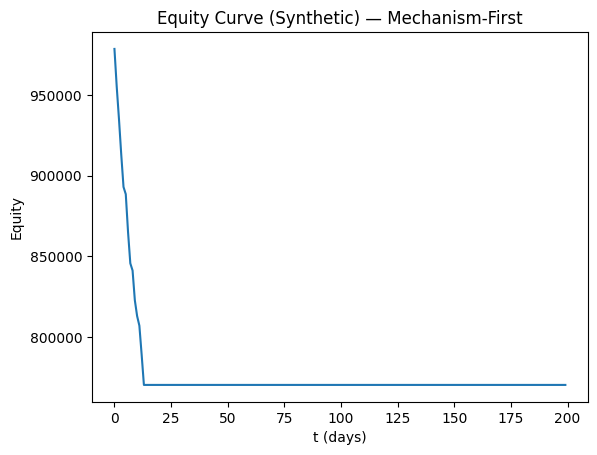

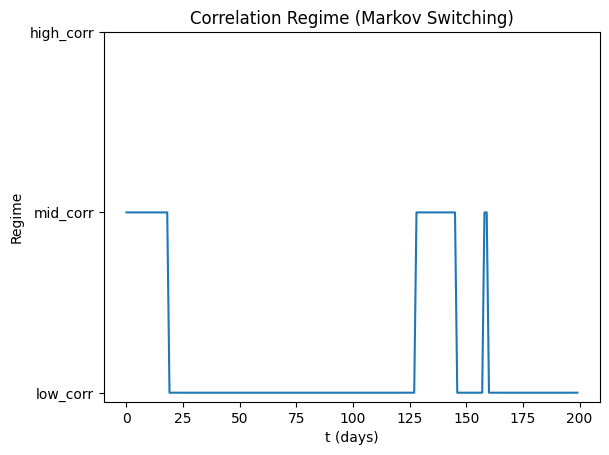

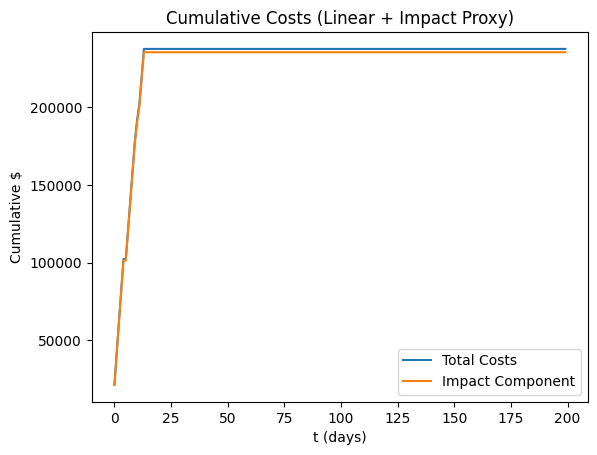

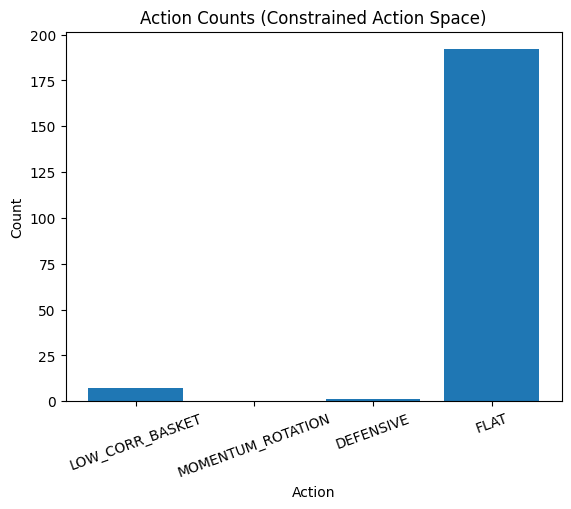

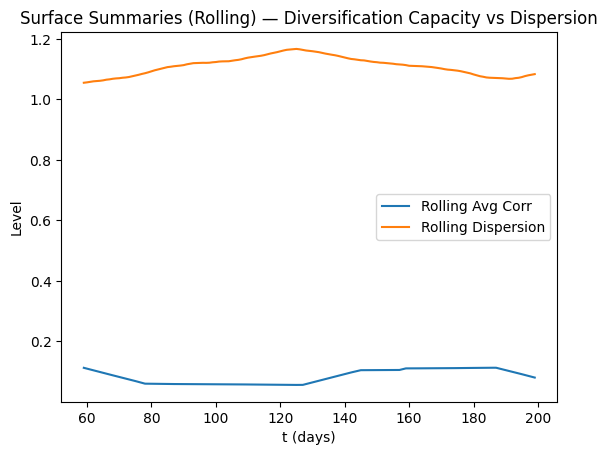

SUMMARY_TABLE:


,final_equity,total_return,max_drawdown,ann_return_est,ann_vol_est,sharpe_est,cum_costs,cum_impact,avg_turnover_l1,avg_gross_leverage
0,770325.205316,-0.212843,0.229675,-0.299828,0.077629,-3.862326,237547.950295,235432.886515,0.059783,0.036347



ACTION_COUNTS:


,count
action,
LOW_CORR_BASKET,7
MOMENTUM_ROTATION,0
DEFENSIVE,1
FLAT,192



INTERPRETIVE_TABLE (Mechanism → Observation → Fragility → Execution):


,mechanism,observation_in_lab,fragility,execution_note
0,Diversification premium when correlations are ...,LOW_CORR_BASKET tends to stabilize realized vo...,Benefit collapses as avg_corr rises; portfolio...,Turnover becomes expensive exactly when regime...
1,Rotation premium (momentum) in mid regimes wit...,MOMENTUM_ROTATION can add return when leadersh...,"In high_corr regimes, leadership often breaks ...",Rotation concentrates trades; nonlinear impact...
2,"Defensive posture is a survival trade, not an ...",DEFENSIVE reduces gross exposure and drawdown ...,Opportunity cost in benign regimes; can underp...,Lower turnover can dominate PnL when costs/imp...
3,Risk limits dominate optimization in stress,"Drawdown stop forces FLAT, truncating tail los...",Forced de-risking can lock in losses; path-dep...,Institutional reality: constraints and costs c...



REQUIRED LESSON:
DIVERSIFICATION IS A REGIME-LOCAL PROPERTY


In [ ]:
# CELL 10 — Code: diagnostics + interpretive table (plots + action counts + costs + lesson table)

df = bt_df.copy()

# Action counts
action_counts = df["action"].value_counts().reindex(ACTIONS).fillna(0).astype(int)

# Rolling stats: rolling avg correlation and dispersion
win = 60
df["avg_corr_roll"] = df["avg_corr"].rolling(win).mean()
df["disp_roll"] = df["dispersion"].rolling(win).mean()

# Equity + costs
df["cum_costs"] = df["costs"].cumsum()
df["cum_impact"] = df["impact"].cumsum()

# ---- Plot 1: Equity curve
plt.figure()
plt.plot(df["t"], df["equity"])
plt.title("Equity Curve (Synthetic) — Mechanism-First")
plt.xlabel("t (days)")
plt.ylabel("Equity")
plt.show()

# ---- Plot 2: Regime path (as numeric)
reg_map = {"low_corr": 0, "mid_corr": 1, "high_corr": 2}
reg_num = df["regime"].map(reg_map).astype(int)

plt.figure()
plt.plot(df["t"], reg_num)
plt.yticks([0, 1, 2], ["low_corr", "mid_corr", "high_corr"])
plt.title("Correlation Regime (Markov Switching)")
plt.xlabel("t (days)")
plt.ylabel("Regime")
plt.show()

# ---- Plot 3: Cost accumulation
plt.figure()
plt.plot(df["t"], df["cum_costs"], label="Total Costs")
plt.plot(df["t"], df["cum_impact"], label="Impact Component")
plt.title("Cumulative Costs (Linear + Impact Proxy)")
plt.xlabel("t (days)")
plt.ylabel("Cumulative $")
plt.legend()
plt.show()

# ---- Plot 4: Action counts
plt.figure()
plt.bar(action_counts.index, action_counts.values)
plt.title("Action Counts (Constrained Action Space)")
plt.xlabel("Action")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

# ---- Plot 5: Surface summaries (rolling avg corr and dispersion)
plt.figure()
plt.plot(df["t"], df["avg_corr_roll"], label="Rolling Avg Corr")
plt.plot(df["t"], df["disp_roll"], label="Rolling Dispersion")
plt.title("Surface Summaries (Rolling) — Diversification Capacity vs Dispersion")
plt.xlabel("t (days)")
plt.ylabel("Level")
plt.legend()
plt.show()

# ---- Summary metrics table
eq = df["equity"].values
rets = np.diff(eq) / np.maximum(eq[:-1], 1e-12)
ann_ret = float(np.mean(rets) * 252.0) if len(rets) > 2 else 0.0
ann_vol = float(np.std(rets) * math.sqrt(252.0)) if len(rets) > 2 else 0.0
sharpe = float(ann_ret / max(ann_vol, 1e-12)) if len(rets) > 2 else 0.0

summary = pd.DataFrame([{
    "final_equity": float(eq[-1]),
    "total_return": float(eq[-1]/eq[0]-1.0),
    "max_drawdown": float(df["drawdown"].max()),
    "ann_return_est": ann_ret,
    "ann_vol_est": ann_vol,
    "sharpe_est": sharpe,
    "cum_costs": float(df["costs"].sum()),
    "cum_impact": float(df["impact"].sum()),
    "avg_turnover_l1": float(df["turnover_l1"].mean()),
    "avg_gross_leverage": float(df["gross_leverage"].mean()),
}])
print("SUMMARY_TABLE:")
display(summary)

print("\nACTION_COUNTS:")
display(action_counts.to_frame("count"))

# ---- Interpretive mechanism table (the “lesson object”)
interpretive = pd.DataFrame([
    {
        "mechanism": "Diversification premium when correlations are low and dispersion is present",
        "observation_in_lab": "LOW_CORR_BASKET tends to stabilize realized vol and reduce drawdown in low_corr regimes",
        "fragility": "Benefit collapses as avg_corr rises; portfolio behaves like a single crowded risk exposure",
        "execution_note": "Turnover becomes expensive exactly when regimes shift; impact proxy rises with high_corr illiquidity"
    },
    {
        "mechanism": "Rotation premium (momentum) in mid regimes with persistent leadership",
        "observation_in_lab": "MOMENTUM_ROTATION can add return when leadership is clear and corr is moderate",
        "fragility": "In high_corr regimes, leadership often breaks as macro factor dominates; whipsaw risk increases",
        "execution_note": "Rotation concentrates trades; nonlinear impact penalizes frequent reshuffling under stress"
    },
    {
        "mechanism": "Defensive posture is a survival trade, not an edge trade",
        "observation_in_lab": "DEFENSIVE reduces gross exposure and drawdown in high_corr regimes",
        "fragility": "Opportunity cost in benign regimes; can underperform when dispersion returns suddenly",
        "execution_note": "Lower turnover can dominate PnL when costs/impact are elevated"
    },
    {
        "mechanism": "Risk limits dominate optimization in stress",
        "observation_in_lab": "Drawdown stop forces FLAT, truncating tail loss at the cost of missing rebounds",
        "fragility": "Forced de-risking can lock in losses; path-dependence is central to regime-local diversification",
        "execution_note": "Institutional reality: constraints and costs convert ex-ante surfaces into ex-post fragility"
    },
])

print("\nINTERPRETIVE_TABLE (Mechanism → Observation → Fragility → Execution):")
display(interpretive)

print("\nREQUIRED LESSON:")
print("DIVERSIFICATION IS A REGIME-LOCAL PROPERTY")


##11.CONCLUSION

**Conclusion**

**What was learned: the covariance surface is the mechanism**  
This notebook is built to make one structural claim operational: diversification is regime-local. The claim is not philosophical; it is encoded in the environment’s geometry. The tradable surface is the factor covariance/correlation matrix, and the agent’s outcomes are determined less by any particular “factor alpha” and more by how the covariance surface changes across regimes. In low-correlation regimes, exposure decomposition behaves the way textbooks suggest: risk is distributed, dispersion supports differentiated outcomes, and a diversified basket can act as a stable carrier of small premia. In high-correlation regimes, the same construction collapses toward a single common risk, and the portfolio’s realized behavior becomes dominated by the regime transition and the execution layer.

A practical way to summarize what was learned is to separate three ideas that are often conflated in casual factor discussions. First, factor returns may have premia in expectation. Second, realized outcomes depend on covariance structure that is not constant and not exogenous. Third, the act of trading—turnover, liquidity, impact, constraints—mediates the translation from exposures to PnL. The notebook’s point is that the second and third often dominate the first at the horizon relevant to institutional risk management.

**Structural insights: regime-local diversification and the fallacy of label-based hedging**  
A common professional comfort is to hold many “different” sleeves—value, momentum, quality, defensive, and so on—believing that the portfolio is diversified because the sleeves are labeled differently. The laboratory shows why that comfort can be misplaced. When correlations rise, the effective rank of the covariance matrix falls; many exposures load on a shared driver. This can happen even if the factor definitions are orthogonal in construction. The correlation regime is therefore a market state that redefines what “different” means. Diversification is not a property of names; it is a property of the joint distribution conditional on state.

The regime-local framing also clarifies why diversification tends to fail at the worst time. In stress, investors sell what they can, not what they want. Balance-sheet constraints tighten, risk limits bind, and liquidity thins. These forces increase commonality in returns. The covariance surface becomes denser precisely when drawdowns are accumulating and the institution’s tolerance for volatility is shrinking. The notebook captures this by tying illiquidity and impact severity to the high-correlation regime. The coupling is intentional: it is the professional reality that costs rise when risk is most acute.

**Fragility modes: how factor portfolios fail in this laboratory**  
Several fragility modes emerge repeatedly in this setup.

One is the **diversification-collapse mode**: a portfolio that is well-behaved in low-correlation regimes experiences a sharp increase in realized risk when the regime shifts. The portfolio has not “changed its mind,” but the surface has changed its meaning. The same weight vector maps to a different covariance geometry, and drawdowns accelerate.

A second is the **rotation-whipsaw mode**: momentum rotation can be reasonable when leadership is persistent and correlations are moderate. In high-correlation regimes, leadership becomes unstable or irrelevant relative to the common shock, and rotation becomes turnover without risk reduction. The mechanism is not that momentum is always wrong; it is that the state that makes momentum attractive is not the state that makes rotation cheap or safe.

A third is the **execution-amplification mode**: the cost layer is convex. Turnover produces linear costs, but impact costs accelerate with trade size and illiquidity. When regime shifts induce defensive rebalancing, the portfolio pays higher marginal costs for trades that are executed under worse liquidity conditions. This is a compact representation of a broader fact: execution is not independent noise; it is state-dependent and often pro-cyclical with stress.

A fourth is the **constraint-dominance mode**: leverage caps, position limits, and drawdown stops change the feasible set of responses. In high-correlation regimes, an unconstrained optimizer might attempt to scale exposures down smoothly. In institutional reality, discrete constraints often force discontinuous actions—de-risking, concentration limits, or forced flat. The notebook’s drawdown stop makes that discontinuity explicit and observable in logs and action counts.

**Carry, regime behavior, and surface dynamics in an equity-factor setting**  
In fixed income or volatility markets, “carry” has a direct mechanical meaning. In factors, the analogous concept is the steady accumulation of small premia—compensation for bearing certain exposures—when the market state is hospitable. The laboratory encodes this as regime-dependent drift in factor returns: positive in calm, weaker in transition, and adverse in stress. That is not a claim about any specific factor’s true expected return; it is a teaching device to represent the idea that premia are often earned in calm and charged in stress.

The core structural insight is that the covariance surface is a state projection. The regime process alters average correlation; dispersion dynamics modulate effective correlation and cross-sectional richness. Together, these states determine whether the market supports differentiated factor outcomes or compresses them into a common risk. This is the equilibrium interpretation that students should internalize: the surface is not merely estimated; it is generated by underlying constraints and common shocks.

**Why execution dominates theory: the conversion from exposure to realized outcome**  
The most important professional lesson reinforced by this notebook is that elegant exposure logic is not sufficient. Even if one grants that some factor premia exist, the realized path depends on when and how the portfolio trades. Two portfolios with identical long-run exposures can have materially different outcomes due solely to differences in turnover and trading state. The execution layer in this notebook is designed to make that unavoidable. Linear costs penalize frequent adjustment. Impact costs penalize large adjustments in illiquid regimes. When correlations spike and a portfolio seeks safety, it is often forced to trade at the worst time.

This execution dominance also reframes what “risk management” means. Risk management is not only ex-ante sizing; it is also the management of trading intensity under state shifts. A defensive action that reduces covariance exposure may still be costly enough to degrade outcomes if implemented with high turnover at precisely the wrong time. The notebook’s diagnostics—cumulative costs, impact accumulation, action counts—are therefore as central as the equity curve.

**How to iterate experimentally: using the notebook as a controlled laboratory**  
The design encourages systematic experimentation with explicit hypotheses. Several productive directions are immediate.

One can vary **regime persistence** to test whether strategies rely on slow-moving regimes. If high-correlation regimes are brief but severe, the value of defensive posture may depend on execution costs more than on risk reduction. If regimes are persistent, the cost of remaining defensive may be offset by avoided drawdowns.

One can vary **correlation levels and dispersion targets** to explore how much diversification capacity is needed for the low-correlation basket to behave robustly. This directly tests the boundary between genuine diversification and label-based diversification.

One can vary **execution severity**—both linear costs and impact convexity—to measure how sensitive rotation behavior is to trading frictions. This is particularly relevant for momentum rotation, which is structurally turnover-intensive.

One can vary **risk constraints**, including leverage caps and drawdown stops, to examine constraint-dominance. Tight constraints can protect survival but can also force path-dependent lock-ins that change the strategy’s effective regime timing.

Finally, one can compare the deterministic baseline policy with the optional LLM policy to evaluate whether mechanism-aware discipline can be replicated by a constrained natural-language agent without giving it control of parameters or code. The correct interpretation is not “the LLM is smarter,” but “does the LLM respect the same structural logic under identical constraints.”

**Professional intuition to retain**  
The notebook’s final interpretive table is not an afterthought; it is the mechanism summary. It connects the surface to the observation and the observation to fragility and execution. The durable intuition is that diversification is a conditional property: it depends on correlation regime and dispersion. In stress, the world often becomes one trade, and the portfolio’s fate is determined by constraints and execution. A practitioner who internalizes this will read factor backtests differently, will treat covariance as a state variable rather than a static input, and will understand that the “best” strategy in a frictionless model can be the worst strategy once trading costs and regime shifts are made explicit.

The notebook is therefore best understood as a mechanism microscope. It does not ask whether factors are real; it asks under what conditions factor diversification is meaningful, when it fails, and how costs and constraints convert that failure into realized drawdowns. That is the pedagogical outcome: a sharper structural sense of what is being traded when one trades “diversified factors,” and why the regime-local nature of diversification must be central to any serious discussion of systematic equity portfolios.
